## Note: it takes about 5 minutes to run the first cell.

In [1]:
!pip install nltk
!pip install pyLDAvis
!pip install gensim
!pip3 install bertopic

     |████████████████████████████████| 90 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 85 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 15.7 MB 51.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.2 MB 34.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.5 MB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 58.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 60.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 32.6 MB/s eta 0:00:01
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2444523 sha256=b4f58ea10e29cdcc1d7685ddf4de81a18173e6fff1ab7a4ac8ff532955244123
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for sentence-transformers: filena

# After runing this cell **restart the notebook** and continue from here.

In [2]:
!pip install git+https://github.com/goolig/dsClass.git

  Cloning https://github.com/goolig/dsClass.git to /tmp/pip-req-build-nk17p4p3
  Running command git clone -q https://github.com/goolig/dsClass.git /tmp/pip-req-build-nk17p4p3
  Resolved https://github.com/goolig/dsClass.git to commit 67567d1d71a8a747c8a68c621045fe53ff139103
     |████████████████████████████████| 278 kB 4.1 MB/s eta 0:00:01
  Created wheel for dsClass: filename=dsClass-1.0.27-py3-none-any.whl size=16372733 sha256=21b18b08994b456864de50ead63085871fe6049964a91bb30f143d1940b2606e
  Stored in directory: /tmp/pip-ephem-wheel-cache-awyp7wef/wheels/cc/7d/ca/f5036d591d94a23e6ab49777866b7fc723500ce0dcdb2a9b2e
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=0c901498cb0395b7ad256f7de5c390553cbb0824fe70fe4329dfa9e051ef8d65
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built dsClass pydotplus


In [3]:
from dsClass.path_helper import *

In [4]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarit
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer as Lemmatizer
from nltk.corpus import stopwords
import pyLDAvis.gensim
from gensim.models import ldamulticore 
from gensim.corpora.dictionary import Dictionary
from nltk.stem.porter import PorterStemmer
import numpy as np
import pickle
from bertopic import BERTopic
import time

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Feature selection 

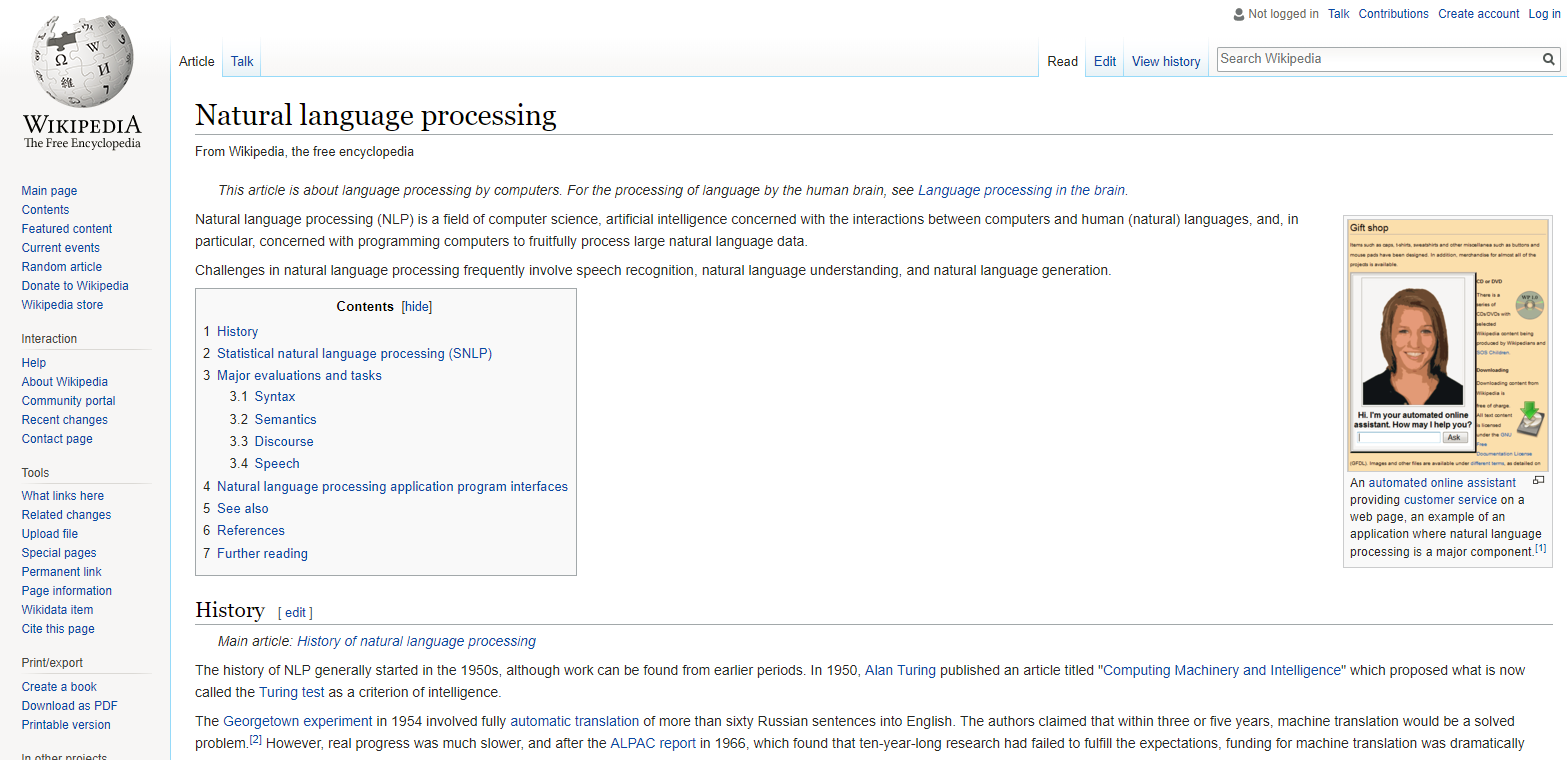

In [5]:
text = '''The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966. Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction. When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "Why do you say your head hurts?".

During the 1970s, many programmers began to write "conceptual ontologies", which structured real-world information into computer-understandable data. Examples are MARGIE (Schank, 1975), SAM (Cullingford, 1978), PAM (Wilensky, 1978), TaleSpin (Meehan, 1976), QUALM (Lehnert, 1977), Politics (Carbonell, 1979), and Plot Units (Lehnert 1981). During this time, many chatterbots were written including PARRY, Racter, and Jabberwacky.

Up to the 1980s, most NLP systems were based on complex sets of hand-written rules. Starting in the late 1980s, however, there was a revolution in NLP with the introduction of machine learning algorithms for language processing. This was due to both the steady increase in computational power (see Moore's law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing.[3] Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules. However, part-of-speech tagging introduced the use of hidden Markov models to NLP, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data. The cache language models upon which many speech recognition systems now rely are examples of such statistical models. Such models are generally more robust when given unfamiliar input, especially input that contains errors (as is very common for real-world data), and produce more reliable results when integrated into a larger system comprising multiple subtasks.

Many of the notable early successes occurred in the field of machine translation, due especially to work at IBM Research, where successively more complicated statistical models were developed. These systems were able to take advantage of existing multilingual textual corpora that had been produced by the Parliament of Canada and the European Union as a result of laws calling for the translation of all governmental proceedings into all official languages of the corresponding systems of government. However, most other systems depended on corpora specifically developed for the tasks implemented by these systems, which was (and often continues to be) a major limitation in the success of these systems. As a result, a great deal of research has gone into methods of more effectively learning from limited amounts of data.

Recent research has increasingly focused on unsupervised and semi-supervised learning algorithms. Such algorithms are able to learn from data that has not been hand-annotated with the desired answers, or using a combination of annotated and non-annotated data. Generally, this task is much more difficult than supervised learning, and typically produces less accurate results for a given amount of input data. However, there is an enormous amount of non-annotated data available (including, among other things, the entire content of the World Wide Web), which can often make up for the inferior results.

In recent years, there has been a flurry of results showing deep learning techniques[4][5] achieving state-of-the-art results in many natural language tasks, for example in language modeling,[6] parsing,[7][8] and many others.'''

corpus = [line for line in text.splitlines() if line != '']

In [6]:
corpus[0]

'The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.'

## Tokenization

In [7]:
cv = CountVectorizer(lowercase=False)
termMatrix = cv.fit_transform(corpus)
df = pd.DataFrame(data=termMatrix.toarray(),columns=cv.get_feature_names())
df

,1950,1950s,1954,1960s,1964,1966,1970s,1975,1976,1977,...,working,world,worlds,would,write,written,year,years,you,your
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,0,1,1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,1
3,0,0,0,0,0,0,1,1,1,1,...,0,1,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
print (corpus[0])
df.iloc[0][df.iloc[0]>0].to_frame().T

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.


,1950,1950s,Alan,Computing,In,Intelligence,Machinery,NLP,The,Turing,...,periods,proposed,published,started,test,the,titled,what,which,work
0,1,1,1,1,1,1,1,1,1,2,...,1,1,1,1,1,2,1,1,1,1


## Removing all punctuation, numbers and stop words

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
cv = CountVectorizer(analyzer="word",token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',stop_words=set(stopwords.words('english')))
termMatrix = cv.fit_transform(corpus)
df = pd.DataFrame(data=termMatrix.toarray(),columns=cv.get_feature_names())
df

,able,accurate,achieving,advantage,alan,algorithms,almost,alpac,although,among,...,within,work,working,world,worlds,would,write,written,year,years
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,1,0,0,0,2,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
print (corpus[0])
df.iloc[0][df.iloc[0]>0].to_frame().T

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.


,alan,although,article,called,computing,criterion,earlier,found,generally,history,...,machinery,nlp,periods,proposed,published,started,test,titled,turing,work
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,1


## Bigram

In [12]:
cv = CountVectorizer(analyzer="word",token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',stop_words=set(stopwords.words('english')),ngram_range=(1,2))
termMatrix = cv.fit_transform(corpus)
df = pd.DataFrame(data=termMatrix.toarray(),columns=cv.get_feature_names())
df

,able,able learn,able take,accurate,accurate results,achieving,achieving state,advantage,advantage existing,alan,...,write conceptual,written,written including,written joseph,written rules,year,year long,years,years flurry,years machine
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
5,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [13]:
print (corpus[0])
df.iloc[0][df.iloc[0]>0].to_frame().T

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.


,alan,alan turing,although,although work,article,article titled,called,called turing,computing,computing machinery,...,started although,test,test criterion,titled,titled computing,turing,turing published,turing test,work,work found
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1


## Test set

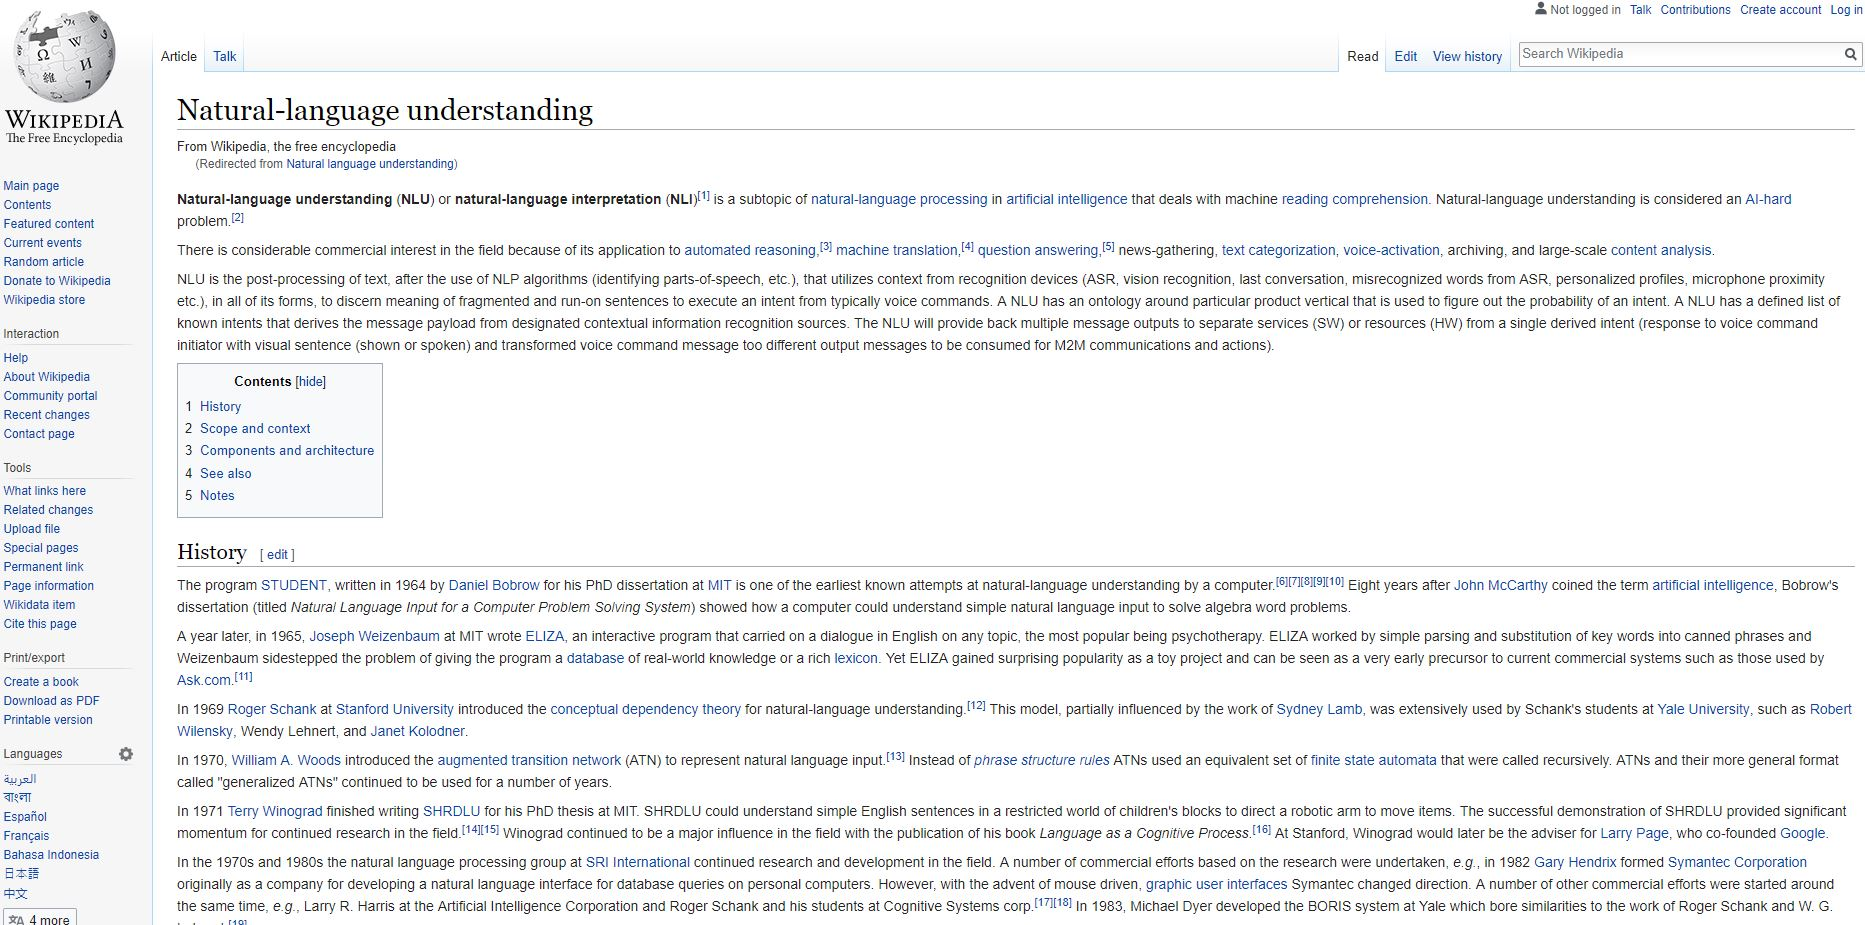

In [14]:
testText = '''The program STUDENT, written in 1964 by Daniel Bobrow for his PhD dissertation at MIT is one of the earliest known attempts at natural-language understanding by a computer.[6][7][8][9][10] Eight years after John McCarthy coined the term artificial intelligence, Bobrow's dissertation (titled Natural Language Input for a Computer Problem Solving System) showed how a computer could understand simple natural language input to solve algebra word problems.

A year later, in 1965, Joseph Weizenbaum at MIT wrote ELIZA, an interactive program that carried on a dialogue in English on any topic, the most popular being psychotherapy. ELIZA worked by simple parsing and substitution of key words into canned phrases and Weizenbaum sidestepped the problem of giving the program a database of real-world knowledge or a rich lexicon. Yet ELIZA gained surprising popularity as a toy project and can be seen as a very early precursor to current commercial systems such as those used by Ask.com.[11]

In 1969 Roger Schank at Stanford University introduced the conceptual dependency theory for natural-language understanding.[12] This model, partially influenced by the work of Sydney Lamb, was extensively used by Schank's students at Yale University, such as Robert Wilensky, Wendy Lehnert, and Janet Kolodner.

In 1970, William A. Woods introduced the augmented transition network (ATN) to represent natural language input.[13] Instead of phrase structure rules ATNs used an equivalent set of finite state automata that were called recursively. ATNs and their more general format called "generalized ATNs" continued to be used for a number of years.

In 1971 Terry Winograd finished writing SHRDLU for his PhD thesis at MIT. SHRDLU could understand simple English sentences in a restricted world of children's blocks to direct a robotic arm to move items. The successful demonstration of SHRDLU provided significant momentum for continued research in the field.[14][15] Winograd continued to be a major influence in the field with the publication of his book Language as a Cognitive Process.[16] At Stanford, Winograd would later be the adviser for Larry Page, who co-founded Google.

In the 1970s and 1980s the natural language processing group at SRI International continued research and development in the field. A number of commercial efforts based on the research were undertaken, e.g., in 1982 Gary Hendrix formed Symantec Corporation originally as a company for developing a natural language interface for database queries on personal computers. However, with the advent of mouse driven, graphic user interfaces Symantec changed direction. A number of other commercial efforts were started around the same time, e.g., Larry R. Harris at the Artificial Intelligence Corporation and Roger Schank and his students at Cognitive Systems corp.[17][18] In 1983, Michael Dyer developed the BORIS system at Yale which bore similarities to the work of Roger Schank and W. G. Lehnart.[19]

The third millennium saw the introduction of systems using machine learning for text classification, such as the IBM Watson. However, it is debated how much "understanding" such systems demonstrate, e.g. according to John Searle, Watson did not even understand the questions.[20]

John Ball, cognitive scientist and inventor of Patom Theory supports this assessment. Natural language processing has made inroads for applications to support human productivity in service and ecommerce but this has largely been made possible by narrowing the scope of the application. There are thousands of ways to request something in a human language which still defies conventional natural language processing. "To have a meaningful conversation with machines is only possible when we match every word to the correct meaning based on the meanings of the other words in the sentence – just like a 3-year-old does without guesswork" Patom Theory'''

testCorpus = [line for line in testText.splitlines() if line != '']

In [15]:
testTermMatrix = cv.transform(testCorpus)
testDf = pd.DataFrame(data=testTermMatrix.toarray(),columns=cv.get_feature_names())

In [16]:
print (testCorpus[0])
testDf.iloc[0][testDf.iloc[0]>0].to_frame().T

The program STUDENT, written in 1964 by Daniel Bobrow for his PhD dissertation at MIT is one of the earliest known attempts at natural-language understanding by a computer.[6][7][8][9][10] Eight years after John McCarthy coined the term artificial intelligence, Bobrow's dissertation (titled Natural Language Input for a Computer Problem Solving System) showed how a computer could understand simple natural language input to solve algebra word problems.


,computer,earliest,input,intelligence,language,natural,natural language,problem,system,titled,written,years
0,3,1,2,1,3,3,3,1,1,1,1,1


## Lemmatization

In [17]:
lemmatizer = Lemmatizer()
print (lemmatizer.lemmatize('ate',pos='v'))
print(lemmatizer.lemmatize('leaves'))

eat
leaf


### As opposed to stemming

In [18]:
stemmer = PorterStemmer()
print (stemmer.stem('ate'))
print(stemmer.stem('leaves'))

ate
leav


# Topic modeling

In [19]:
# Load some categories 
categories = [
    'sci.space',
    'alt.atheism',
    'comp.graphics',
    'rec.sport.baseball'
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)
trainDataset = fetch_20newsgroups(categories=categories,subset='train',shuffle=True, remove=('headers', 'footers', 'quotes'))
testDataset = fetch_20newsgroups(categories=categories,subset='test',shuffle=True, remove=('headers', 'footers', 'quotes'))
# with open('testDataset.pickle', 'rb') as handle:
#     trainDataset = pickle.load(handle)
# with open('testDataset.pickle', 'rb') as handle:
#     testDataset = pickle.load(handle)

print("%d documents for training" % len(trainDataset.data))
print("%d documents for testing" % len(testDataset.data))
print("%d categories" % len(trainDataset.target_names))

Loading 20 newsgroups dataset for categories:
['sci.space', 'alt.atheism', 'comp.graphics', 'rec.sport.baseball']
2254 documents for training
1499 documents for testing
4 categories


# Data preparation 

## Filter out small docs

In [20]:
def filterSmallDocs(docs,targets):
    indices = [i for i in range(0,len(docs)) if len(docs[i].split())>20]
    filteredDocs = [docs[i] for i in indices]
    filteredTarget = [targets[i] for i in indices]
    return filteredDocs,filteredTarget

In [21]:
trainDocs, trainTarget = filterSmallDocs(trainDataset.data,trainDataset.target)
testDocs, testTarget = filterSmallDocs(testDataset.data,testDataset.target)

## How does the docs distribute over the topics

In [22]:
pd.Series(trainTarget).value_counts()

3    534
1    516
2    490
0    425
dtype: int64

In [23]:
pd.Series(testTarget).value_counts()

3    349
1    346
2    338
0    278
dtype: int64

In [24]:
cv = CountVectorizer(analyzer="word",token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',stop_words='english',min_df=50, max_df=0.8, ngram_range=(1,2))
data = cv.fit_transform(trainDocs)
data = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
data

,able,access,actually,add,address,advance,ago,agree,al,answer,...,working,works,world,wouldn,write,written,wrong,year,years,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1961,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert the term matrix into term lists

In [25]:
cols = data.columns
bt = data.apply(lambda x: x > 0)
bt = bt.apply(lambda x: list(cols[x.values]), axis=1)
bt

0                    [built, don, don think, just, think]
1       [ask, bit, change, don, file, heard, just, kno...
2       [based, didn, edu, know, line, mac, programs, ...
3       [better, bit, called, commercial, course, day,...
4                         [fact, known, long, orbit, yes]
                              ...                        
1960         [actually, man, number, players, university]
1961    [actually, case, com, comes, far, given, infor...
1962               [ll, maybe, play, right, season, time]
1963    [basically, days, don, don think, got, guess, ...
1964                        [data, form, line, set, used]
Length: 1965, dtype: object

## Turn our tokenized documents into an id term, frequancy list

In [26]:
dictionary = Dictionary(bt)
# convert tokenized documents into a document-term matrix
corpusTopicModeling = [dictionary.doc2bow(text) for text in bt]
corpusTopicModeling[0:3]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(1, 1),
  (3, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(10, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)]]

In [27]:
dictionary[0]

'built'

In [28]:
print("The model has %d features" % (len(dictionary)))

The model has 340 features


# Modeling using LDA

In [29]:
#This is a sample code for training the model. It takes a while, so we already trained it for you 

#ldaModel = ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, passes=150, num_topics=4)
#with open('ldaModel.pickle', 'wb') as handle:
#    pickle.dump(ldaModel, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [30]:
with open(get_file_path('ldaModel.pickle'), 'rb') as handle:
    ldaModel = pickle.load(handle)

In [31]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldaModel, corpusTopicModeling,dictionary,R=20,mds="tsne")

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  37.313909
3        1.782994 -295.079681       2        1  21.360084
2      220.811432 -343.832123       3        1  21.046083
0       50.533993  -76.050934       4        1  20.279925, topic_info=         Term        Freq       Total Category  logprob  loglift
48      space  235.000000  235.000000  Default  20.0000  20.0000
113    thanks  199.000000  199.000000  Default  19.0000  19.0000
251      year  236.000000  236.000000  Default  18.0000  18.0000
181  graphics  129.000000  129.000000  Default  17.0000  17.0000
196      game  120.000000  120.000000  Default  16.0000  16.0000
..        ...         ...         ...      ...      ...      ...
11       like  110.454842  469.698609   Topic4  -4.1189   0.1481
3        just  102.687086  433.316677   Topic4  -4.1918   0.1558
74       time   93.662062  331.047905   Topic4  -4.2838   0.3330
1         don   84.001091  445.753553   Topic4  -4.3926  -0.0734
41         ll   74.475255  183.090426   Topic4  -4.5130   0.6960

[153 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
165       2  0.988275  address
239       2  0.969744  advance
239       4  0.014919  advance
325       1  0.976680    agree
325       4  0.013198    agree
...     ...       ...      ...
251       3  0.265949     year
251       4  0.730306     year
51        1  0.128071    years
51        3  0.430320    years
51        4  0.435443    years

[257 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [32]:
 ldaModel.show_topics(formatted=False)

[(0,
  [('year', 0.025458157),
   ('game', 0.017570145),
   ('like', 0.016263098),
   ('think', 0.01620684),
   ('good', 0.016142676),
   ('team', 0.015898217),
   ('just', 0.015119392),
   ('games', 0.014063816),
   ('time', 0.01379057),
   ('baseball', 0.012894804)]),
 (1,
  [('don', 0.024067786),
   ('think', 0.020810897),
   ('just', 0.018352589),
   ('people', 0.018069614),
   ('like', 0.015503514),
   ('say', 0.014905944),
   ('know', 0.013641485),
   ('does', 0.012891971),
   ('way', 0.010932128),
   ('thing', 0.010241804)]),
 (2,
  [('space', 0.033328358),
   ('nasa', 0.016827945),
   ('earth', 0.014880039),
   ('new', 0.0126420595),
   ('orbit', 0.012416884),
   ('years', 0.011970996),
   ('time', 0.01165617),
   ('long', 0.01153383),
   ('launch', 0.011420396),
   ('high', 0.010989247)]),
 (3,
  [('thanks', 0.027171412),
   ('know', 0.020599812),
   ('graphics', 0.01794252),
   ('information', 0.016441157),
   ('mail', 0.016423808),
   ('does', 0.01616163),
   ('program', 0.0

# Modeling using BertTopic

In [33]:
topic_model = BERTopic(n_gram_range=(1,2),nr_topics=4)
topics, probs = topic_model.fit_transform(trainDocs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [34]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,500,-1_the_of_to_and
1,0,509,0_the_to_and_of
2,1,467,1_the_to_and_in
3,2,416,2_the_of_to_is
4,3,73,3_the_and_space_of


In [35]:
bt

0                    [built, don, don think, just, think]
1       [ask, bit, change, don, file, heard, just, kno...
2       [based, didn, edu, know, line, mac, programs, ...
3       [better, bit, called, commercial, course, day,...
4                         [fact, known, long, orbit, yes]
                              ...                        
1960         [actually, man, number, players, university]
1961    [actually, case, com, comes, far, given, infor...
1962               [ll, maybe, play, right, season, time]
1963    [basically, days, don, don think, got, guess, ...
1964                        [data, form, line, set, used]
Length: 1965, dtype: object

In [36]:
cv = CountVectorizer(analyzer="word",token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',stop_words='english',min_df=50, max_df=0.8, ngram_range=(1,2))
data = cv.fit_transform(trainDocs)
data = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
cols = data.columns
bt = data.apply(lambda x: x > 0)
bt = bt.apply(lambda x: " ".join(cols[x.values]), axis=1)

In [37]:
bt

0                          built don don think just think
1       ask bit change don file heard just know like n...
2       based didn edu know line mac programs talking ...
3       better bit called commercial course day days e...
4                               fact known long orbit yes
                              ...                        
1960               actually man number players university
1961    actually case com comes far given information ...
1962                      ll maybe play right season time
1963    basically days don don think got guess let lik...
1964                              data form line set used
Length: 1965, dtype: object

<b>Documantaion:</b> https://github.com/MaartenGr/BERTopic
</br>
<b>Remark</b>: Due to the stochastisch nature of UMAP, the results from BERTopic might differ and the quality can degrade. 

In [38]:
start = time.time()
topic_model = BERTopic(language="english",nr_topics=4)
topics, probs = topic_model.fit_transform(bt)
end = time.time()
print("{} sec".format(int(end - start)))
topic_model.get_topic_info()

34 sec


,Topic,Count,Name
0,-1,888,-1_know_don_like_graphics
1,0,390,0_year_game_games_baseball
2,1,354,1_space_nasa_earth_orbit
3,2,263,2_god_don_think_religion
4,3,70,3_mail_email_thanks_address


<b>Remark:</b> The topic name -1 refers to all documents that did not have any topics assigned. Not all documents are forced towards a certain cluster. If no cluster could be found, then it is simply an outlier.

In [39]:
topic_model.get_topic(2)

[('god', 0.06299658429403501),
 ('don', 0.05756010832427905),
 ('think', 0.05221029418844354),
 ('religion', 0.051430319825000584),
 ('people', 0.049717090180720895),
 ('atheism', 0.04737979353344456),
 ('believe', 0.043773258928754374),
 ('say', 0.04362542067353573),
 ('argument', 0.04290338294053719),
 ('does', 0.04240912372182988)]

In [40]:
topic_model.visualize_topics()

In [41]:
# Prepare data and classes
classes = [trainDataset.target_names[i] for i in trainTarget] 
topics_per_class = topic_model.topics_per_class(bt, classes)
topic_model.visualize_topics_per_class(topics_per_class)

# Q1: Analyzing the graph
Turn on all of the topics from the lenged. Hint: click on the rectangles.
1. Which topic was best idenfitied by the model?
1. Explain why you think so. Discuss the whole graph not only the topic you selected.

1. baseball - topic 0
2. Because in the baseball class, topic 0 is the most frequent relativly to the other topics.
   In other classes the second,third and fourth topics by frequent were relativly larger than in the baseball class 

## <br> Q2. Annotate the topics. I.e., label them based on the word distrubution.
Look at the training set, trainDataset, and on the target attribute, decide on an appropriate name for each topic the LDA model created.

**You are trying to give the names from the training data to the topics numbers the *LDA* model created**.


So if you thing that the topic number 0 by the LDA model is rec.sport.baseball than the first element in the list will be 'rec.sport.baseball'.

In [42]:
#Q2
topicAnnotation = ['rec.sport.baseball',
                   'alt.atheism',                   
                   'sci.space',
                   'comp.graphics']
#replace letters with the names you choose

## <br> Q3. Evalute the LDA model using accuracy score_method (SKLEARN) and print the classification report:
You are expected to read the documentation and use the function properly.

First evaluate on the train set, and then on the test set.

Functions:

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

**Hint**: look at the function ldaModel.get_document_topics for predicting the probabilities of each topic

# Train

In [117]:
#Q3 Train set
trainDataset.target_names

['alt.atheism', 'comp.graphics', 'rec.sport.baseball', 'sci.space']

In [118]:
getDocTop = ldaModel.get_document_topics(corpusTopicModeling)
print("Length of getDocumentTopics result :",len(getDocTop))
for i in range(10):
    print("Row", i, "is :", getDocTop[i])

#for every training sample we have all the odds to be in some label  

Length of getDocumentTopics result : 1965
Row 0 is : [(0, 0.043600246), (1, 0.66656387), (2, 0.24786086), (3, 0.041975014)]
Row 1 is : [(0, 0.01622149), (1, 0.578766), (2, 0.016943302), (3, 0.3880692)]
Row 2 is : [(0, 0.023323594), (1, 0.3470344), (2, 0.02166961), (3, 0.60797244)]
Row 3 is : [(0, 0.4556165), (1, 0.010209912), (2, 0.52406037), (3, 0.01011317)]
Row 4 is : [(0, 0.042930093), (1, 0.48421538), (2, 0.43099898), (3, 0.04185559)]
Row 5 is : [(0, 0.023661872), (1, 0.48590115), (2, 0.17698635), (3, 0.3134506)]
Row 6 is : [(0, 0.010329668), (1, 0.6216859), (2, 0.010106247), (3, 0.35787812)]
Row 7 is : [(0, 0.019180607), (1, 0.94232064), (2, 0.019746277), (3, 0.018752467)]
Row 8 is : [(0, 0.050006323), (1, 0.24973303), (2, 0.054065675), (3, 0.646195)]
Row 9 is : [(0, 0.025097683), (1, 0.024119765), (2, 0.9277551), (3, 0.023027489)]


In [125]:
from sklearn.metrics import accuracy_score, classification_report

categories = {'alt.atheism':0, 'comp.graphics':1, 'rec.sport.baseball':2, 'sci.space':3}
predictions = []

for sample in ldaModel.get_document_topics(corpusTopicModeling):
    sample = sorted(sample,key=lambda x: x[1], reverse=True)      #sorts each sample list of probs to be from the highest probability to the lowest
    i = sample[0][0]                                           #the label number that was predicted by the model 
    pred = categories[topicAnnotation[i]]
    predictions.append(pred)       

print("Accuracy score:", accuracy_score(trainTarget, predictions))
print("Classification report:\n",classification_report(trainTarget, predictions))

Accuracy score: 0.7048346055979644
Classification report:
               precision    recall  f1-score   support

           0       0.51      0.88      0.65       425
           1       0.78      0.75      0.76       516
           2       0.83      0.74      0.78       490
           3       0.86      0.49      0.62       534

    accuracy                           0.70      1965
   macro avg       0.75      0.71      0.70      1965
weighted avg       0.76      0.70      0.71      1965



# Test

In [120]:
#Q3 Test set
#turning the data to df
test_set = cv.transform(testDocs)
test_set = pd.DataFrame(test_set.toarray(), columns=cv.get_feature_names())
test_set

,able,access,actually,add,address,advance,ago,agree,al,answer,...,working,works,world,wouldn,write,written,wrong,year,years,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1309,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0


In [121]:
cols = test_set.columns
test = test_set.apply(lambda x: x > 0)
test = test.apply(lambda x: list(cols[x.values]), axis=1)
test

0                  [appreciated, help, hi, looking, mail]
1       [able, earth, flight, idea, interested, kind, ...
2       [april, available, came, computer, date, early...
3       [ago, ask, away, ball, called, consider, consi...
4                                  [ask, day, don, times]
                              ...                        
1306    [advance, hi, information, looking, source, th...
1307                                     [got, right, ve]
1308    [does, don, don think, earth, having, idea, li...
1309    [april, area, average, based, center, clear, c...
1310    [commercial, day, days, did, going, hit, later...
Length: 1311, dtype: object

In [122]:
dictionary = Dictionary(test)
# convert tokenized documents into a document-term matrix
testTopicModeling = [dictionary.doc2bow(text) for text in test]
testTopicModeling[0:2]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)]]

In [124]:
predictions = []
for sample in ldaModel.get_document_topics(testTopicModeling):
    sample = sorted(sample, key=lambda x: x[1], reverse=True)
    i = sample[0][0]           
    pred = dic_categories[topicAnnotation[i]]
    predictions.append(pred)  

print("Accuracy score:", accuracy_score(testTarget, predictions))
print("Classification report:\n",classification_report(testTarget, predictions))

Accuracy score: 0.22807017543859648
Classification report:
               precision    recall  f1-score   support

           0       0.24      0.46      0.32       278
           1       0.16      0.12      0.13       346
           2       0.22      0.14      0.17       338
           3       0.27      0.23      0.25       349

    accuracy                           0.23      1311
   macro avg       0.22      0.24      0.22      1311
weighted avg       0.22      0.23      0.21      1311



## Q5: Topic modelling is considered an unsupervised learning task. Explain why.

We don't have labels for the text we are trying to classify.

It's some type of clustering and clustering belong to unsupervised learning

## Q6: Can [overfitting](https://en.wikipedia.org/wiki/Overfitting) happen in an unsupervised learning task? Explain.

When We have a lot of features, its good for the training set, but classify the test bad.
When a word have alot of different meanings and its classified to a specific topic, the other meanings are neglected.
for example:
"good" is classified to topic 0 (baseball), but "good" can be in related to alot of other topics.

## Q7. Is there a difference between the results of the train and test sets? Explain the reasons behind it.


After the model had been built, if the test set have words which have not appeared in the train set, the model might not classify them to the right topic.
when the model classify one word to a specific meaning and in the test set the word has different meaning it can be classified to the wrong topic which result in an inaccuracy model.
for example : space can be both key in the keyboard and space like outside earth.

## Q8: Guy claims that we have had a very easy life in modelling the topics in our data and that in data collected from the real world it will be harder. What is the main reason for that?
There are pleanty of reasons for that of course, but there is **ONE** major reason for that.

Your answer goes here (Q8)